<center style = "font-family: yekan ; font-size : 32px ; direction : rtl"><b>
    <br>    <br>  
تمرین پایتون درس اقتصاد مهندسی

</b></center>

<table style="width: 80%; text-align: center; font-family: yekan; font-size: 18px; direction: rtl; border-collapse: collapse; margin: auto;">
  <thead>
    <tr>
      <th colspan="2" style="text-align: center;">اعضای گروه</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="text-align: center; padding: 10px;"><b>آمیار سی و سه مرده</b></td>
      <td style="text-align: center; padding: 10px;">401104192</td>
    </tr>
    <tr>
      <td style="text-align: center; padding: 10px;"><b>آرش علیزاده</b></td>
      <td style="text-align: center; padding: 10px;">401104305</td>
    </tr>
    <tr>
      <td style="text-align: center; padding: 10px;"><b>امیرحسین علیمحمدی</b></td>
      <td style="text-align: center; padding: 10px;">401104298</td>
    </tr>
    <tr>
      <td style="text-align: center; padding: 10px;"><b>عماد قره باغی</b></td>
      <td style="text-align: center; padding: 10px;">401104349</td>
    </tr>
    <tr>
      <td style="text-align: center; padding: 10px;"><b>محمدمهدی منتظری هدش</b></td>
      <td style="text-align: center; padding: 10px;">401104479</td>
    </tr>
    <tr>
      <td style="text-align: center; padding: 10px;"><b>نیما نوروزی اصفهانی</b></td>
      <td style="text-align: center; padding: 10px;">401109958</td>
    </tr>
  </tbody>
</table>


<center style = "font-family: yekan ; font-size :22px ; direction : rtl">
دکتر رضاپور<br><br>
</center>
 <center style = "font-family: yekan ; font-size : 18px ; direction : rtl">
بهار ۱۴۰۳<br><br>
</center>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
    ابتدا کتابخانه‌های مورد نیاز را وارد می‌کنیم
:</div>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import formula as ee
import math

<div style = "font-family: yekan ; font-size : 30px ; direction : rtl ; color : #FF0000">
شرح تمرین:</div>


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
در ابتدا فایل داده‌های سوال را می‌خوانیم:</div>

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Years,Salary,material 1,material 2,demand,price
0,1990,39343.0,200.000000,89.600000,103,1200.0
1,1991,46205.0,212.000000,92.662500,104,1375.0
2,1992,37731.0,224.720000,95.807250,101,1451.0
3,1993,43525.0,238.203200,99.034819,99,1593.0
4,1994,39891.0,252.495392,102.345626,95,1718.5


<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
۱. مدیریت داده‌های null
</ul>

</div>


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
برای مدیریت داده‌های null نیاز است ابتدا تعداد سلول‌هایی که مقدار null دارند را در هر ستون از دیتاست اولیه بدست آوریم:</div>

In [3]:
print('Years     :',data['Years'].isnull().sum())
print('Salary    :',data['Salary'].isnull().sum())
print('material 1:',data['material 1'].isnull().sum())
print('material 2:',data['material 2'].isnull().sum())
print('demand    :',data['demand'].isnull().sum())
print('demand    :',data['demand'].isnull().sum())

Years     : 0
Salary    : 3
material 1: 0
material 2: 0
demand    : 0
demand    : 0


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
با توجه به نتیجه به دست آمده می‌دانیم تنها در ستون Salary داده با مقدار null وجود دارد و رویکرد ما برای جایگذاری داده جدید میانگین گیری است که در سلول بعدی آن را انجام می‌دهیم:</div>

In [4]:
data['Salary'] = (data['Salary'].bfill() + data['Salary'].ffill()) / 2
data.head()

,Years,Salary,material 1,material 2,demand,price
0,1990,39343.0,200.000000,89.600000,103,1200.0
1,1991,46205.0,212.000000,92.662500,104,1375.0
2,1992,37731.0,224.720000,95.807250,101,1451.0
3,1993,43525.0,238.203200,99.034819,99,1593.0
4,1994,39891.0,252.495392,102.345626,95,1718.5


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
مجددا بررسی می‌کنیم تا در ستونی داده‌ی null وجود نداشته باشد:</div>

In [5]:
print('Years     :',data['Years'].isnull().sum())
print('Salary    :',data['Salary'].isnull().sum())
print('material 1:',data['material 1'].isnull().sum())
print('material 2:',data['material 2'].isnull().sum())
print('demand    :',data['demand'].isnull().sum())
print('demand    :',data['demand'].isnull().sum())

Years     : 0
Salary    : 0
material 1: 0
material 2: 0
demand    : 0
demand    : 0


<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
۲. پیاده سازی رگرسیون برای پیشبینی حقوق کارمندان 
</ul>

</div>


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
در این مرحله متغیرهای مستقل (سال‌ها) و وابسته (حقوق‌ها) را از داده‌ها جدا می‌کنیم. X شامل سال‌ها و y شامل حقوق‌ها خواهد بود.
</div>

In [6]:
X = data[['Years']].values
y = data['Salary'].values

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
در این مرحله داده‌ها را به دو بخش داده‌های آموزشی (80%) و داده‌های آزمون (20%) تقسیم می‌کنیم. داده‌های آموزشی برای آموزش مدل و داده‌های آزمون برای ارزیابی دقت مدل استفاده می‌شوند:</div>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
حالا مدل رگرسیون خطی را ایجاد می‌کنیم و با استفاده از داده‌های آموزشی آموزش  می‌دهیم:</div>

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
future_years = np.arange(2023, 2051).reshape(-1, 1)
predicted_salaries = model.predict(future_years)

<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
۳. ترسیم نمودار و بررسی دقت مدل رگرسیون 
</ul>

</div>


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
در رسم نمودار داده‌های دقیق را با نقاط مشکی ، خط رگرسیون براورد شده را با خط قرمز ممتد و پیشبینی آینده را با خط قرمز مقطّع نشان می‌دهیم:</div>

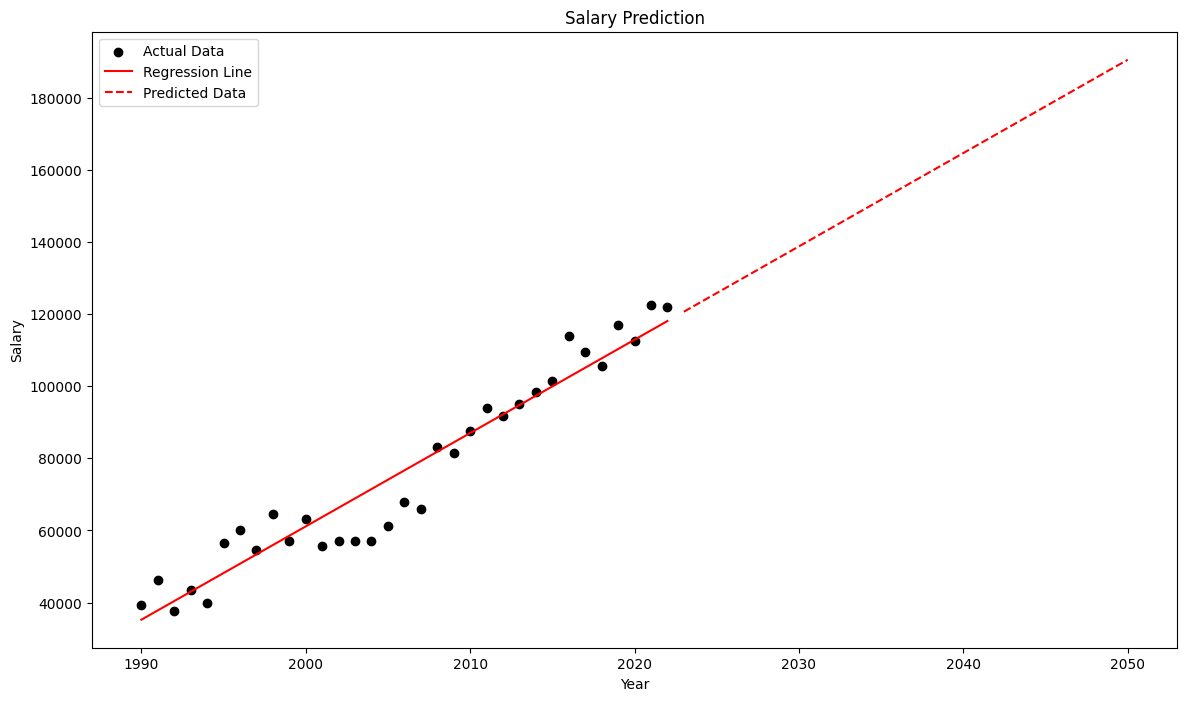

In [10]:
plt.figure(figsize=(14, 8))
plt.scatter(X, y, color='black', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.plot(future_years, predicted_salaries, color='red', linestyle='--', label='Predicted Data')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.legend()
plt.show()

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
در این مرحله مدل آموزش‌دیده برای پیش‌بینی حقوق‌های موجود در داده‌های آزمون استفاده می‌شود و سپس دقت مدل با استفاده از معیارهای MSE (میانگین خطای مربعات) و 
𝑅^2 (ضریب تعیین) محاسبه و گزارش می‌شود:</div>

In [11]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse)}")
print(f"R^2 Score         : {round(r2,2)}")

Mean Squared Error: 53493442
R^2 Score         : 0.92


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl"><b>تحلیل کلی:</b><br><br>
مقدار 0.92 برای R^2 نشان می‌دهد که مدل عملکرد بسیار خوبی دارد و می‌تواند تغییرات حقوق را بر اساس سال‌ها به خوبی توضیح دهد.
</div>

<div style = "font-family: yekan ; font-size : 15px ; direction : rtl; color : red">
یک دیتافریم به نام Prediction ایجاد می‌کنیم تا در تمامی مراحل مقداری پیشبینی شده را برای سال‌های بعد در آن نگه داری کنیم: 
</div>


In [12]:
Prediction = pd.DataFrame({
    'Years': [i for i in range(2023,2051)],
    'Salary': predicted_salaries
    })
Prediction.head()

,Years,Salary
0,2023,120653.884615
1,2024,123242.516484
2,2025,125831.148352
3,2026,128419.780220
4,2027,131008.412088


<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
۴. پیشبینی قیمت ماده ۱ 
</ul>

</div>


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
برای پیش بینی قیمت ماده ۱ در سال‌های آینده از تابع predicted_prices که قبلا ساخته‌ایم استفاده می‌کنیم، این تابع نرخ تورم و نرخ بهره را از ما به عنوان ورودی می‌گیرد و با سایر اطلاعاتی که در مورد قیمت ماده ۱ در سال شروع داریم قیمت را در سال‌های بعدی به ما برمی‌گرداند. 
</div>

In [13]:
current_year = 2022
num_years = 28
inflation_rate = 0.01
interest_rate = 0.05
initial_price = data['material 1'][current_year-1990]

predicted_prices = ee.predict_prices(current_year, num_years, inflation_rate, interest_rate , initial_price)
predicted_prices.head()

,Year,Price
0,2023,1368.117976
1,2024,1450.205055
2,2025,1537.217358
3,2026,1629.450399
4,2027,1727.217423


<div style = "font-family: yekan ; font-size : 15px ; direction : rtl; color : red">
Prediction را اپدیت می‌کنیم:</div>


In [14]:
Prediction['material 1'] = predicted_prices['Price']

<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
۵. پیاده سازی رگرسیون برای پیشبینی قیمت ماده ۲ 
</ul>

</div>


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
    ابتدا تمامی قیمت‌های سال‌های 1990 تا 2022 را به ارزش سال پایه‌ی 1990 تبدیل می‌کنیم؛ برای این کار از تابع present_worth که قبلا در فایل فرمول‌ها ساخته‌ایم استفاده کردیم. 
</div>

In [15]:
material_2 = pd.DataFrame({
    'Years': data['Years'],
    'material 2': data.apply(lambda row: ee.present_worth(row['material 2'],0.05,row.name), axis=1)
    })
material_2.head()

,Years,material 2
0,1990,89.60
1,1991,88.25
2,1992,86.90
3,1993,85.55
4,1994,84.20


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
    سپس با یک مدل رگرسیون خطی ساده قیمت را براساس سال پایه‌ی 1990 برای سال‌های 2023 تا 2050 بدست می‌آوریم؛ چون مراحل ایجاد خط رگرسیون و پیشبینی با بخش ۲ مشابه است از توضیح مراحل انجام کار صرف نظر می‌کنیم: 
</div>

In [16]:
X2 = material_2[['Years']].values
y2 = material_2['material 2'].values

In [17]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [18]:
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression()

In [19]:
predicted_material_2 = model2.predict(future_years)

In [20]:
material_2_prediction = pd.DataFrame({
    'Years': [i for i in range(2023,2051)],
    'material 2': predicted_material_2
})
material_2_prediction.head()

,Years,material 2
0,2023,45.05
1,2024,43.70
2,2025,42.35
3,2026,41.00
4,2027,39.65


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
 نکته حائز توجه این است که مقادیری که تا کنون برای قیمت ماده ۲ در سال‌های پیش رو پیشبینی کرده‌ایم براساس قیمت سال پایه‌ی 1990 هستند و برای تبدیل به قیمت همان سال باید در فاکتور F/P ضرب شوند که در قسمت‌های بعدی انجام داده‌ایم. 
</div>

<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
۶. ترسیم نمودار و بررسی دقت مدل رگرسیون 
</ul>

</div>


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
در رسم نمودار داده‌های دقیق را با نقاط مشکی ، خط رگرسیون براورد شده را با خط قرمز ممتد و پیشبینی آینده را با خط قرمز مقطّع نشان می‌دهیم:</div>

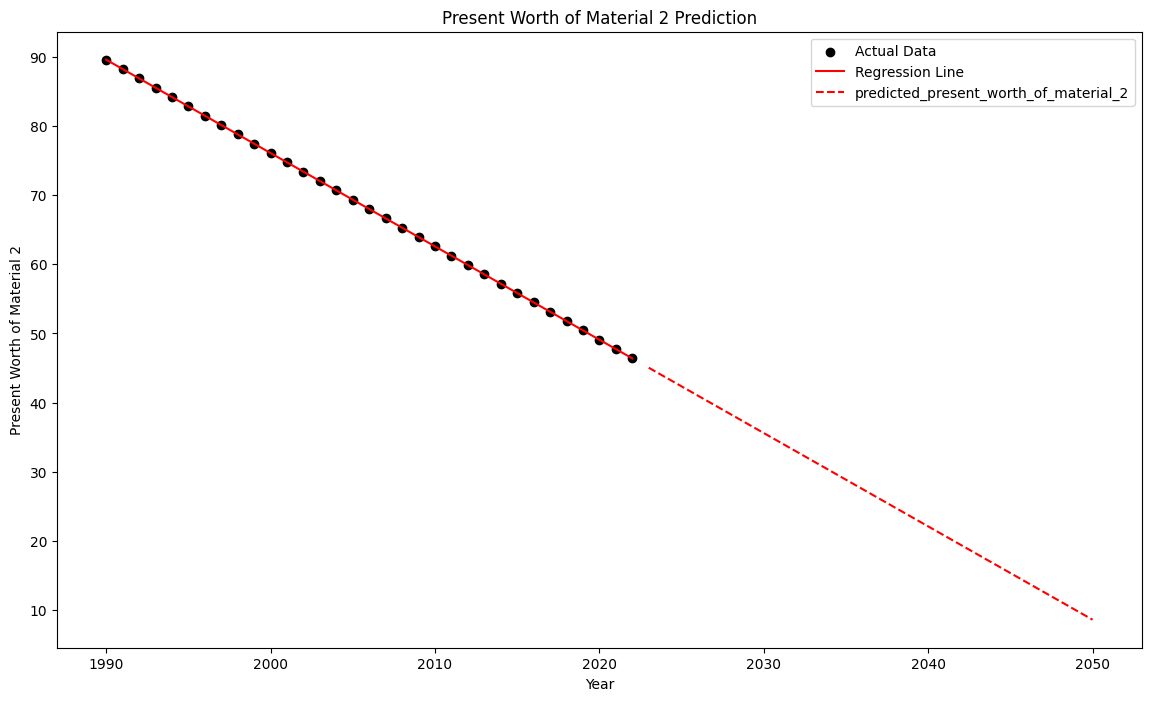

In [21]:
plt.figure(figsize=(14, 8))
plt.scatter(X2, y2, color='black', label='Actual Data')
plt.plot(X2, model2.predict(X2), color='red', label='Regression Line')
plt.plot(future_years, material_2_prediction['material 2'], color='red', linestyle='--', label='predicted_present_worth_of_material_2')
plt.xlabel('Year')
plt.ylabel('Present Worth of Material 2')
plt.title('Present Worth of Material 2 Prediction')
plt.legend()
plt.show()

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
در این مرحله مدل آموزش‌دیده برای پیش‌بینی حقوق‌های موجود در داده‌های آزمون استفاده می‌شود و سپس دقت مدل با استفاده از معیارهای MSE (میانگین خطای مربعات) و 
𝑅^2 (ضریب تعیین) محاسبه و گزارش می‌شود:</div>

In [22]:
y2_pred = model2.predict(X2_test)

mse2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)

print(f"Mean Squared Error: {round(mse2)}")
print(f"R^2 Score         : {round(r2_2,2)}")

Mean Squared Error: 0
R^2 Score         : 1.0


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl"><b>تحلیل کلی:</b><br><br>
مقدار 1.0 برای R^2 نشان می‌دهد که مدل دقیقا مقادیر را درست پیشبینی می‌کند.
</div>

<div style = "font-family: yekan ; font-size : 15px ; direction : rtl; color : red">
Prediction را اپدیت می‌کنیم:</div>


In [23]:
Prediction['material 2'] = material_2_prediction.apply(lambda row: ee.future_value(row['material 2'],0.05,row.name+33), axis=1)

<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
۷. تعریف مقادیر تابع e^(-n/50)
</ul>

</div>


In [24]:
exp = pd.DataFrame({
    'Years': [i for i in range(1990,2051)],
    'Coefficient': [(math.e)**(-((n-1990)/50)) for n in range(1990,2051)]
})
exp.head()

,Years,Coefficient
0,1990,1.000000
1,1991,0.980199
2,1992,0.960789
3,1993,0.941765
4,1994,0.923116


<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
۸. پیاده سازی رگرسیون برای پیشبینی تقاضا 
</ul>

</div>


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
     با یک مدل رگرسیون خطی ساده تقاضا را بر برای سال‌های 2023 تا 2050 بدست می‌آوریم؛ چون مراحل ایجاد خط رگرسیون و پیشبینی با بخش ۲ مشابه است از توضیح مراحل انجام کار صرف نظر می‌کنیم: 
</div>

In [25]:
X3 = exp[['Coefficient']][:33].values
y3 = data['demand'].values

In [26]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=0)

In [27]:
model3 = LinearRegression()
model3.fit(X3_train, y3_train)

LinearRegression()

In [28]:
predicted_demand = model3.predict(exp[['Coefficient']][33:].values)

<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
۹.  ترسیم نمودار و بررسی دقت مدل رگرسیون 
</ul>

</div>


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
در رسم نمودار داده‌های دقیق را با نقاط مشکی ، خط رگرسیون براورد شده را با خط قرمز ممتد و پیشبینی آینده را با خط قرمز مقطّع نشان می‌دهیم:</div>

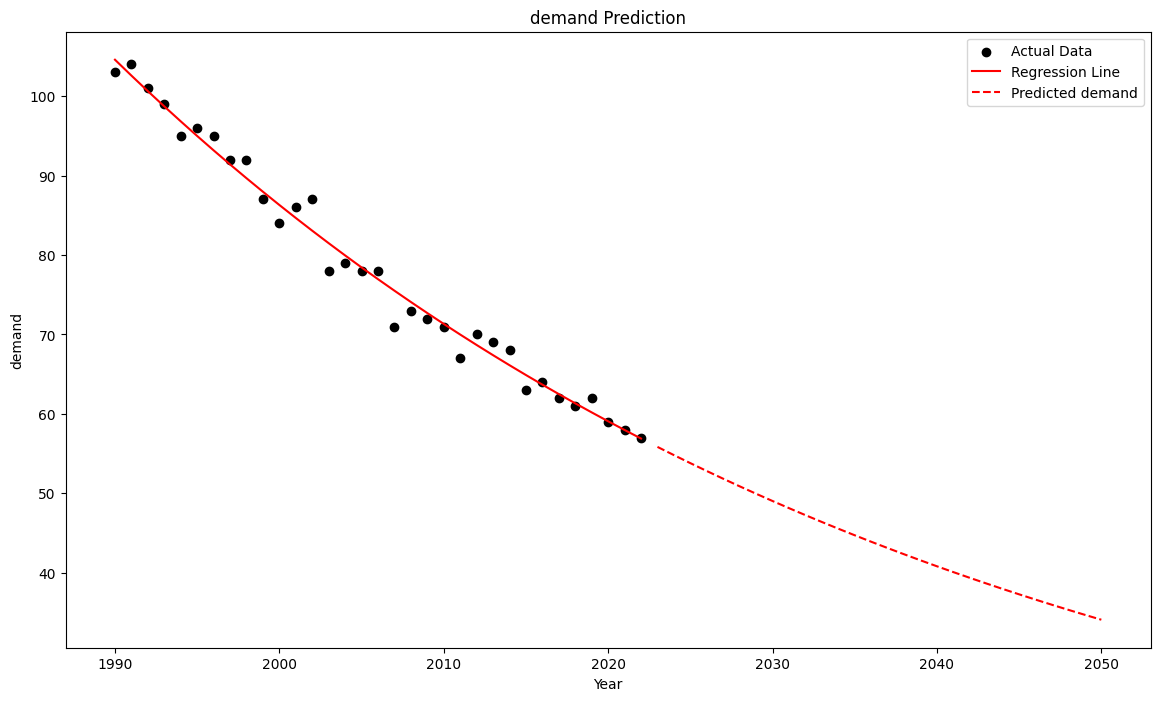

In [29]:
plt.figure(figsize=(14, 8))
plt.scatter(X2, y3, color='black', label='Actual Data')
plt.plot(X2, model3.predict(X3), color='red', label='Regression Line')
plt.plot(future_years, predicted_demand, color='red', linestyle='--', label='Predicted demand')
plt.xlabel('Year')
plt.ylabel('demand')
plt.title('demand Prediction')
plt.legend()
plt.show()

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
در این مرحله مدل آموزش‌دیده برای پیش‌بینی حقوق‌های موجود در داده‌های آزمون استفاده می‌شود و سپس دقت مدل با استفاده از معیارهای MSE (میانگین خطای مربعات) و 
𝑅^2 (ضریب تعیین) محاسبه و گزارش می‌شود:</div>

In [30]:
y3_pred = model3.predict(X3_test)

mse3 = mean_squared_error(y3_test, y3_pred)
r2_3 = r2_score(y3_test, y3_pred)

print(f"Mean Squared Error: {round(mse3)}")
print(f"R^2 Score         : {round(r2_3,2)}")

Mean Squared Error: 4
R^2 Score         : 0.97


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl"><b>تحلیل کلی:</b><br><br>
مقدار 0.97 برای R^2 نشان می‌دهد که دقت مدل بسیار بالا است.
</div>

<div style = "font-family: yekan ; font-size : 15px ; direction : rtl; color : red">
Prediction را اپدیت می‌کنیم:</div>


In [31]:
Prediction['demand'] = predicted_demand

<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
۱۰. پیاده سازی رگرسیون برای پیشبینی قیمت هر واحد محصول نهایی 
</ul>

</div>


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
     با یک مدل رگرسیون خطی ساده قیمت هرواحد محصول نهایی را بر برای سال‌های 2023 تا 2050 بدست می‌آوریم؛ چون مراحل ایجاد خط رگرسیون و پیشبینی با بخش ۲ مشابه است از توضیح مراحل انجام کار صرف نظر می‌کنیم: 
</div>

In [32]:
X4 = data[['Years']].values
y4 = data['price'].values

In [33]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=0)

In [34]:
model4 = LinearRegression()
model4.fit(X4_train, y4_train)

LinearRegression()

In [35]:
predicted_prices = model4.predict(future_years)

<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
۱۱.  ترسیم نمودار و بررسی دقت مدل رگرسیون 
</ul>

</div>


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
در رسم نمودار داده‌های دقیق را با نقاط مشکی ، خط رگرسیون براورد شده را با خط قرمز ممتد و پیشبینی آینده را با خط قرمز مقطّع نشان می‌دهیم:</div>

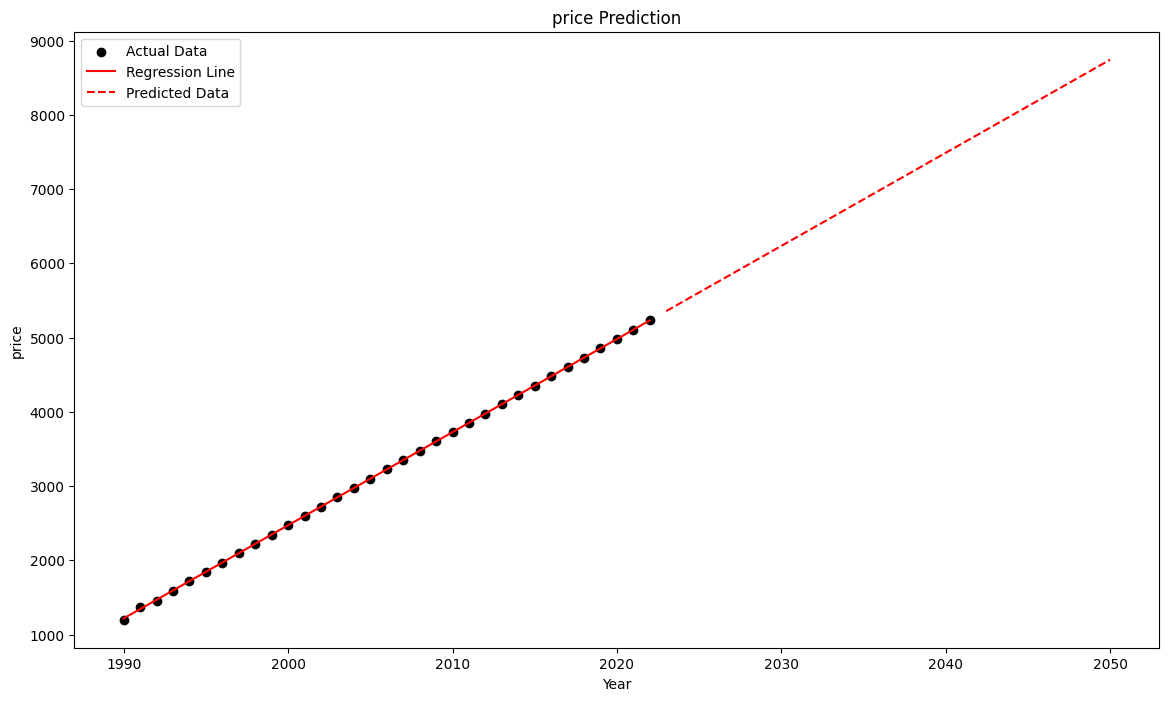

In [36]:
plt.figure(figsize=(14, 8))
plt.scatter(X4, y4, color='black', label='Actual Data')
plt.plot(X4, model4.predict(X4), color='red', label='Regression Line')
plt.plot(future_years, predicted_prices, color='red', linestyle='--', label='Predicted Data')
plt.xlabel('Year')
plt.ylabel('price')
plt.title('price Prediction')
plt.legend()
plt.show()

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
در این مرحله مدل آموزش‌دیده برای پیش‌بینی حقوق‌های موجود در داده‌های آزمون استفاده می‌شود و سپس دقت مدل با استفاده از معیارهای MSE (میانگین خطای مربعات) و 
𝑅^2 (ضریب تعیین) محاسبه و گزارش می‌شود:</div>

In [37]:
y4_pred = model4.predict(X4_test)

mse4 = mean_squared_error(y4_test, y4_pred)
r2_4 = r2_score(y4_test, y4_pred)

print(f"Mean Squared Error: {round(mse4)}")
print(f"R^2 Score         : {round(r2_4,2)}")

Mean Squared Error: 48
R^2 Score         : 1.0


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl"><b>تحلیل کلی:</b><br><br>
مقدار 1.0 برای R^2 نشان می‌دهد که مدل دقیقا مقادیر را درست پیشبینی می‌کند.
</div>

<div style = "font-family: yekan ; font-size : 15px ; direction : rtl; color : red">
Prediction را اپدیت می‌کنیم:</div>


In [38]:
Prediction['price'] = predicted_prices

<div style = "font-family: yekan ; font-size : 19px ; direction : rtl; color : red">
در نهایت دیتافریمی که حاوی دیتای اولیه و موارد پیشبینی شده است را به صورت زیر خواهیم داشت:</div>


In [39]:
final_data = pd.concat([data, Prediction], axis=0,ignore_index=True)

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
بعد از اینکه دو دیتافریم اولیه و پیشبینی شده را به یکدیگر به صورت عمودی متصل کردیم نیاز است داده‌های پیشبینی شده را به فرمت داده‌های اولیه نزدیک کنیم؛ یعنی به طور مثال ستون تقاضا همواره یک عدد صحیح را شامل می‌شود ، قیمت همواره عددی با یک رقم اعشار 0 یا 5 است و ...
</div>

In [40]:
final_data['Salary'] = final_data['Salary'].apply(ee.round_to_nearest_half)
final_data['demand'] = pd.to_numeric(final_data['demand'], errors='coerce').round().astype(int)
final_data['price'] = final_data['price'].apply(ee.round_to_nearest_half)
final_data

,Years,Salary,material 1,material 2,demand,price
0,1990,39343.0,200.000000,89.600000,103,1200.0
1,1991,46205.0,212.000000,92.662500,104,1375.0
2,1992,37731.0,224.720000,95.807250,101,1451.0
3,1993,43525.0,238.203200,99.034819,99,1593.0
4,1994,39891.0,252.495392,102.345626,95,1718.5
...,...,...,...,...,...,...
56,2046,180192.5,5225.868176,215.143774,37,8241.5
57,2047,182781.0,5539.420267,204.117656,36,8367.0
58,2048,185369.5,5871.785483,191.451066,35,8492.5
59,2049,187958.5,6224.092612,177.007523,35,8618.0


<div style = "font-family: yekan ; font-size : 30px ; direction : rtl ; color : #FF0000">
خواسته‌ها:</div>


<div style = "font-family: yekan ; font-size : 28px ; direction : rtl; color : #9900CC">
<ul>
۱. خواسته اول</ul>

</div>


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
ابتدا تخفیف‌های مد نظر مسئله را بر روی قیمت ماده ۲ اعمال می‌کنیم و قیمت جدید را در یک ستون جدید در دیتاست نهایی ذخیره می‌کنیم:
</div>

In [41]:
material_2_Discounted = []

for i in range(len(final_data['material 2'])):
    if final_data['demand'][i] > 60:
        material_2_Discounted.append(final_data['material 2'][i]*0.82)
    elif final_data['demand'][i] > 40:
        material_2_Discounted.append(final_data['material 2'][i]*0.9)
    elif final_data['demand'][i] > 20:
        material_2_Discounted.append(final_data['material 2'][i]*0.95)        
    else:
        material_2_Discounted.append(final_data['material 2'][i])

final_data['material 2 Discounted'] = material_2_Discounted

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
    در ادامه برای بدست آوردن سود شرکت در هر سال نیاز است تا میزان هزینه و درآمد شرکت را محاسبه کنیم؛ <br><br>
    <b>درآمد</b> شرکت حاصل ضرب قیمت محصول در تقاضا است.<br>
<b>    هزینه‌های</b> شرکت شامل هزینه متغیر ماده ۱ و۲ که وابسته به تقاضا و هزینه کارگر که مستقل از تقاضا است، می‌شود. <br><br>سپس یک ستون که بیانگر سود شرکت در آن سال است را از تفاضل درآمد و هزینه بدست می‌آوریم:
</div>

In [42]:
revenue = final_data['price']*final_data['demand']
final_data['revenue'] = revenue

In [43]:
total_cost = (final_data['material 1']+final_data['material 2 Discounted'])*final_data['demand'] + final_data['Salary']
final_data['total cost'] = total_cost

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
درآمدها(رنگ سبز) و هزینه‌ها(رنگ قرمز) را در یک cash flow نمایش می‌دهیم:
</div>

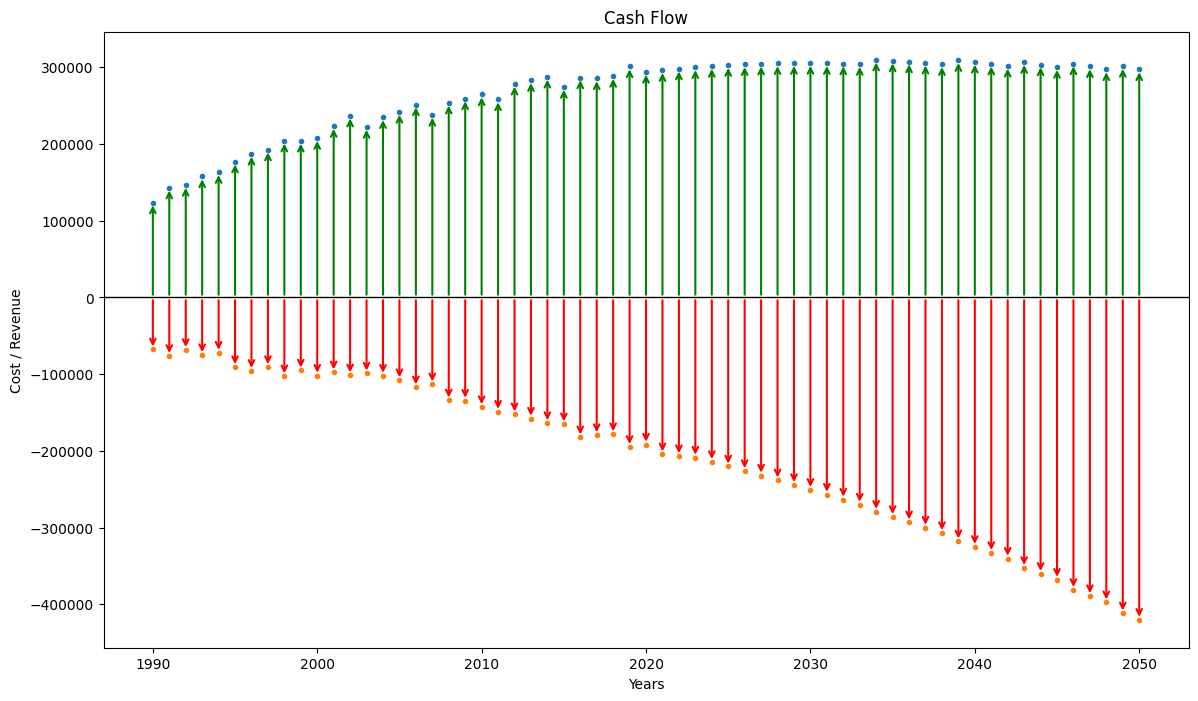

In [44]:
plt.figure(figsize=(14, 8))

plt.scatter(final_data['Years'], final_data['revenue'], marker='.')
for i, row in final_data.iterrows():
    plt.annotate('', xy=(row['Years'], row['revenue']), xytext=(row['Years'], 0),
                 arrowprops=dict(arrowstyle='->', color='green', lw=1.5))

plt.scatter(final_data['Years'], -final_data['total cost'], marker='.')
for i, row in final_data.iterrows():
    plt.annotate('', xy=(row['Years'], -row['total cost']), xytext=(row['Years'], 0),
                 arrowprops=dict(arrowstyle='->', color='red', lw=1.5))
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

plt.title('Cash Flow')
plt.xlabel('Years')
plt.ylabel('Cost / Revenue')
plt.show()

In [45]:
final_data['profit'] = final_data['revenue'] - final_data['total cost']
final_data.head()

,Years,Salary,material 1,material 2,demand,price,material 2 Discounted,revenue,total cost,profit
0,1990,39343.0,200.000000,89.600000,103,1200.0,73.472000,123600.0,67510.616000,56089.384000
1,1991,46205.0,212.000000,92.662500,104,1375.0,75.983250,143000.0,76155.258000,66844.742000
2,1992,37731.0,224.720000,95.807250,101,1451.0,78.561945,146551.0,68362.476445,78188.523555
3,1993,43525.0,238.203200,99.034819,99,1593.0,81.208551,157707.0,75146.763386,82560.236614
4,1994,39891.0,252.495392,102.345626,95,1718.5,83.923414,163257.5,71850.786529,91406.713471


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
سود را در یک cash flow نمایش می‌دهیم،‌ برای تشخیص راحت‌تر سودهای مثبت را با رنگ سبز و سودهای منفی(ضررها) را با رنگ قرمز ترسیم می‌کنیم:
</div>

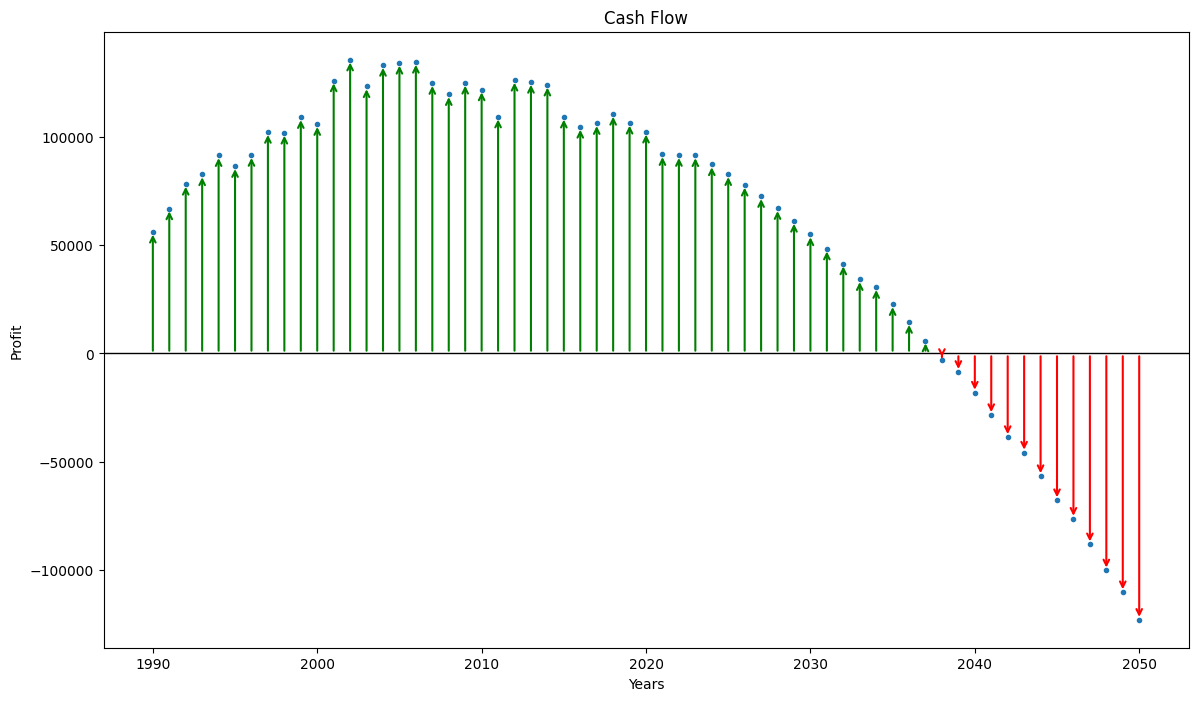

In [46]:
plt.figure(figsize=(14, 8))

plt.scatter(final_data['Years'], final_data['profit'], marker='.')
for i, row in final_data.iterrows():
    color = 'green' if row['profit'] >= 0 else 'red'
    plt.annotate('', xy=(row['Years'], row['profit']), xytext=(row['Years'], 0),
                 arrowprops=dict(arrowstyle='->', color=color, lw=1.5))
    
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

plt.title('Cash Flow')
plt.xlabel('Years')
plt.ylabel('Profit')
plt.show()

In [47]:
final_data[final_data['profit'] > 0]['Years'].max()

2037

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
همانطور که هم از cash flow و هم از طریق کد بدست آمد شرکت تا سال<b>  2037</b> سودده خواهد بود.</div>

<div style = "font-family: yekan ; font-size : 28px ; direction : rtl; color : #9900CC">
<ul>
۲. خواسته دوم</ul>

</div>


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">ابتدا یک دیتا فریم با ستون‌های Years و profit در بازه زمانی 2022 تا 2032 می‌سازیم تا تمام محاسبات را روی این دیتافریم انجام دهیم:</div>

In [48]:
saving = final_data.loc[32:42, ['Years','profit']]
saving

,Years,profit
32,2022,91469.806374
33,2023,91363.553688
34,2024,87169.942332
35,2025,82638.144679
36,2026,77767.574012
37,2027,72533.413631
38,2028,66988.148579
39,2029,61106.100170
40,2030,54887.963570
41,2031,48336.348642


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">سهم ذی‌نفع:</div>

In [49]:
saving['shareholder'] = saving['profit'] * 0.25

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">تمام سود سهم ذی‌نفع را به قیمت سال پایه‌ی 2022 تبدیل می‌کنیم:</div>

In [50]:
saving['shareholder present worth'] = saving.apply(lambda row: ee.present_worth(row['shareholder'],0.05,row.name-32), axis=1)
saving

,Years,profit,shareholder,shareholder present worth
32,2022,91469.806374,22867.451593,22867.451593
33,2023,91363.553688,22840.888422,21753.227069
34,2024,87169.942332,21792.485583,19766.426833
35,2025,82638.144679,20659.536170,17846.484112
36,2026,77767.574012,19441.893503,15994.893899
37,2027,72533.413631,18133.353408,14207.956881
38,2028,66988.148579,16747.037145,12496.896965
39,2029,61106.100170,15276.525043,10856.741137
40,2030,54887.963570,13721.990892,9287.583561
41,2031,48336.348642,12084.087161,7789.510328


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">20% سود ذی‌نفع در سال پایه را برای پس انداز به دست می‌آوریم این مقدار را به عنوان P به تابع محاسبه‌گر مقدار سالانه می‌دهیم در واقع می‌خواهیم از ضریب A/P استفاده کنیم:</div>

In [51]:
P = saving['shareholder present worth'].sum()*0.2

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">سپس مقدار P را به تابع محاسبه‌گر مقدار یکنواخت سالانه که قبلا در فایل .py تعریف کرده‌ایم می‌دهیم تا مقدار پس‌انداز سالانه این ذی‌نفع را بدست آوریم:</div>

In [52]:
ee.Annual(P,0.05,11)

3833.8873492215744

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">بنابرین این ذی‌نفع باید سالانه <b>3,834</b> پس‌انداز کند.</div>

<div style = "font-family: yekan ; font-size : 28px ; direction : rtl; color : #9900CC">
<ul>
۳. خواسته سوم</ul>

</div>


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">ابتدا یک دیتا فریم با ستون‌های Years و profit در بازه زمانی 2022 تا 2050 می‌سازیم تا تمام محاسبات را روی این دیتافریم انجام دهیم:</div>

In [53]:
sale = final_data.loc[32:, ['Years','profit']]
sale.head()

,Years,profit
32,2022,91469.806374
33,2023,91363.553688
34,2024,87169.942332
35,2025,82638.144679
36,2026,77767.574012


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">تمام سودهای شرکت را به قیمت سال پایه‌ی 2022 تبدیل می‌کنیم:</div>

In [54]:
sale['profit present worth'] = sale.apply(lambda row: ee.present_worth(row['profit'],0.05,row.name-32), axis=1)
sale.head()

,Years,profit,profit present worth
32,2022,91469.806374,91469.806374
33,2023,91363.553688,87012.908274
34,2024,87169.942332,79065.707331
35,2025,82638.144679,71385.936447
36,2026,77767.574012,63979.575598


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">سود شرکت را از سال 2022 تا 2050 به ارزش سال پایه 2022 جمع می‌زنیم تا سودنهایی شرکت در این بازه زمانی در سال پایه بدست آید:</div>

In [55]:
sale['profit present worth'].sum()

461638.35941237165

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">چون خریدار می‌خواهد در سال پایه 250k هم سود کند بنابرین از این مبلغ که معادل سود شرکت در سال‌های پیش رو (البته به قیمت سال پایه 2022) است باید کمتر بپردازد: </div>

In [56]:
sale['profit present worth'].sum() - 250000

211638.35941237165

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">مبلغی که خریدار باید بپردازد تا شرایط مسئله اعمال شود <b>211,638</b> است.</div>